# **ニューラルネットワークによる予測**

## **Quest1: データの整形**

1. 分析のためのライブラリであるnumpyとpandasを読み込み、データセットdata_sample6.csvを変数sample6に代入せよ。その後、確認のため、sample6の配列の形状を出力せよ。

データセット: https://drive.google.com/drive/folders/10XRURtOTwDtz4DFbLFurbACohCYdEQb5?usp=sharing

In [1003]:
import numpy as np
import pandas as pd
sample6=pd.read_csv("data_sample6.csv")
sample6.shape

(729, 7)



> **カラム名称	説明**



*   Date:	取引日
*   Open:	始値
*   High:	高値
*   Close	終値
*   Adj Close:	調整後終値 ※
*   Up:	翌取引日に終値が上昇したか否か（1:上昇, 0:非上昇）


2. info関数を用いて、sample6各カラムの詳細を表示して確認せよ。

In [1004]:
sample6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       729 non-null    object 
 1   Open       729 non-null    float64
 2   High       729 non-null    float64
 3   Low        729 non-null    float64
 4   Close      729 non-null    float64
 5   Adj Close  729 non-null    float64
 6   Up         729 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.0+ KB


3. カラムDateのデータ型をobject型からdatetime64型に変更せよ。

In [1005]:
sample6["Date"]=pd.to_datetime(sample6["Date"],format="%d/%m/%Y")

4. カラムDateを昇順で並び替え、並び替え後の結果を更新し、そのカラムのみを出力せよ。



In [1006]:
sample6=sample6.sort_values("Date",ascending=True)
sample6["Date"]

728   2015-01-02
727   2015-01-05
726   2015-01-06
725   2015-01-07
724   2015-01-08
         ...    
4     2017-11-15
3     2017-11-16
2     2017-11-17
1     2017-11-20
0     2017-11-21
Name: Date, Length: 729, dtype: datetime64[ns]

5. set_index関数を用いて、Dateをインデックスとして扱うように変換し、データフレームをせよ。

In [1007]:
sample6=sample6.set_index("Date")
sample6

,Open,High,Low,Close,Adj Close,Up
Date,,,,,,
2015-01-02,218.063990,219.800000,213.567993,214.815991,214.815991,0
2015-01-05,212.710970,213.806966,207.782967,208.854964,208.854964,0
2015-01-06,208.659894,209.267902,200.771906,203.099909,203.099909,1
2015-01-07,203.477875,206.501874,201.741864,204.213885,204.213885,1
2015-01-08,208.479642,210.735649,205.111625,208.591630,208.591630,0
...,...,...,...,...,...,...
2017-11-15,872.589114,876.381106,868.285110,872.333059,872.333059,1
2017-11-16,871.964526,878.364526,871.876538,877.668530,877.668530,0
2017-11-17,880.549034,880.965050,870.573058,873.829015,873.829015,0


6. duplicated関数を用いて、CloseとAdj Closeが重複しているかどうかを確認せよ。

In [1008]:
x=sample6[["Close","Adj Close"]]
y=x.transpose()
y.duplicated()

Close        False
Adj Close     True
dtype: bool

7. drop関数を用いて、Quest1-6で確認した重複カラムAdj Closeを削除し、更新せよ。その後、先頭5行を出力し、更新されたことを確認せよ。

In [1009]:
sample6=sample6.drop("Adj Close",axis=1)
sample6.head()

,Open,High,Low,Close,Up
Date,,,,,
2015-01-02,218.063990,219.800000,213.567993,214.815991,0
2015-01-05,212.710970,213.806966,207.782967,208.854964,0
2015-01-06,208.659894,209.267902,200.771906,203.099909,1
2015-01-07,203.477875,206.501874,201.741864,204.213885,1
2015-01-08,208.479642,210.735649,205.111625,208.591630,0


## **Quest2: グラフで確認**

1. ライブラリmatplotlibのモジュールpyplotを省略語pltとしてインポートせよ。その後、Open, High, Low, Closeのカラムのみを変数smaple6_newとして抽出し、折れ線グラフを描け。


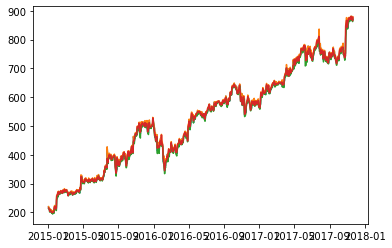

In [1010]:
from matplotlib import pyplot as plt
sample6_new=sample6[["Open", "High", "Low", "Close"]]
plt.plot(sample6_new)

In [1011]:
sample6_new

,Open,High,Low,Close
Date,,,,
2015-01-02,218.063990,219.800000,213.567993,214.815991
2015-01-05,212.710970,213.806966,207.782967,208.854964
2015-01-06,208.659894,209.267902,200.771906,203.099909
2015-01-07,203.477875,206.501874,201.741864,204.213885
2015-01-08,208.479642,210.735649,205.111625,208.591630
...,...,...,...,...
2017-11-15,872.589114,876.381106,868.285110,872.333059
2017-11-16,871.964526,878.364526,871.876538,877.668530
2017-11-17,880.549034,880.965050,870.573058,873.829015


2. datetime関数を使用して2017年10月1日以降のデータをsample6_newから抽出し、折れ線グラフを描け。

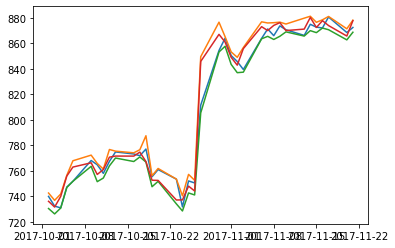

In [1040]:
import datetime 
plt.plot(sample6_new[sample6_new.index>=datetime.datetime(2017,9,30)])

3. sample6からUpのみを取得し、sr_upに代入し表示せよ。

In [1013]:
sr_up=sample6["Up"]

4. resample関数を用いて、Upを月ごとにサンプリングし、変数up_monthlyに代入せよ。


In [1014]:
up_monthly=sr_up.resample("M")

5.  Quest2-4でサンプリングした結果から平均値を算出し、変数up_meanに代入せよ。そして、
plot関数を使用して月ごとのUpの平均値を折れ線グラフで描け。

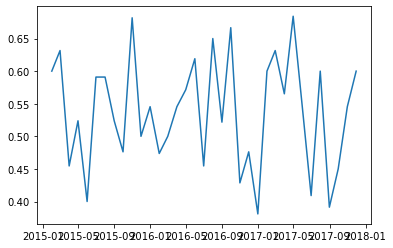

In [1015]:
up_mean=up_monthly.mean()
plt.plot(up_mean)

## **Quest3: 予測モデルの作成**

株価の推移の表し方としては、4つの指標をまとめて表現するローソクチャートと呼ばれる表現もあります。

＜詳しくは[こちら](https://min-fx.jp/market/main-technicals/candlestick/)＞


ローソクチャートにおいて、始値と終値の差はローソクの胴体と呼ばれており、これが長いほど、現在の上昇あるいは下降の勢いが続く傾向にあると言われています。

　1. sample6からOpenとCloseの差額を計算し、新たなカラムBodyを作成せよ。そして、先頭５行を表示し確認せよ。

In [1016]:
Body=sample6["Open"]-sample6["Close"]
sample6=pd.concat([sample6, Body], axis=1)
sample6=sample6.rename(columns={0:"Body"})

2. 予測モデル作成のため、sklearn.model_selectionライブラリからtrain_test_splitをインポートせよ。そして、説明変数Upを（修正　説明変数Open, High, Low, Close, BodyをX_dataに格納ください。)X_dataに、目的変数となるそれ以外のカラムをy_dataに格納して、データを分割せよ。

In [1017]:
from sklearn.model_selection import train_test_split
X_data=sample6[["Open","High","Low","Close","Body"]]
y_data=sample6["Up"]

In [1018]:
X_tret,X_test,y_tret,y_test=train_test_split(X_data,y_data,train_size=0.80,shuffle=False)
X_train,X_val,y_train,y_val=train_test_split(X_tret,y_tret,train_size=0.75,shuffle=False)

4. カラムCloseの学習データ・検証データ・評価データを、plot関数を用いて一つの折れ線グラフとして描け。

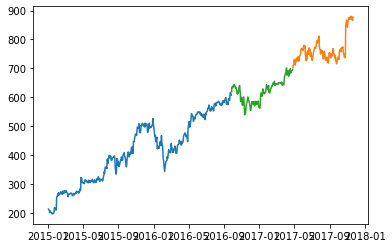

In [1019]:
plt.plot(X_train["Close"])
plt.plot(X_test["Close"])
plt.plot(X_val["Close"])

## **Quest4: データ構造の変形**

1. 指定の日数ごとのまとまりとしてデータを抽出する処理を行う自作関数を、 get_tという名で定義した。これを利用して5日ごとをまとまりとしたデータを生成し、学習データの一件目を出力して、一件のデータが5日分のまとまりになっていることを確認せよ。



```
# 関数get_tの定義
def get_t(X, num_date):
    X_t_list = []
    for i in range(len(X) - num_date + 1):
        X_t = X.iloc[i:i+num_date, :]
        X_t_list.append(X_t)
    return X_t_list
```



In [1020]:
def get_t(X, num_date):
    X_t_list = []
    for i in range(len(X) - num_date + 1):
        X_t = X.iloc[i:i+num_date, :]
        X_t_list.append(X_t)
    return X_t_list
get_t(X_train,5)

[                  Open        High         Low       Close      Body
 Date                                                                
 2015-01-02  218.063990  219.800000  213.567993  214.815991  3.247999
 2015-01-05  212.710970  213.806966  207.782967  208.854964  3.856006
 2015-01-06  208.659894  209.267902  200.771906  203.099909  5.559985
 2015-01-07  203.477875  206.501874  201.741864  204.213885 -0.736010
 2015-01-08  208.479642  210.735649  205.111625  208.591630 -0.111988,
                   Open        High         Low       Close      Body
 Date                                                                
 2015-01-05  212.710970  213.806966  207.782967  208.854964  3.856006
 2015-01-06  208.659894  209.267902  200.771906  203.099909  5.559985
 2015-01-07  203.477875  206.501874  201.741864  204.213885 -0.736010
 2015-01-08  208.479642  210.735649  205.111625  208.591630 -0.111988
 2015-01-09  209.262467  210.374454  205.422453  205.622453  3.640014,
                  



> データフレームのままでデータの抽出を行いましたが、 数値処理を行う場合にはnumpyのNumPy配列を用いた時の方が処理速度が向上が見込まれます。



2. 標準化のためのライブラリsklearn.preprocessingからStandardScaler、NumPy配列を作るためにライブラリnumpyをインポートせよ。

In [1021]:
from sklearn.preprocessing import StandardScaler
import numpy as np

3. 関数get_standardized_tを以下のように定義した。関数中で以下の処理を追記せよ。

> 1.   返り値をNumPy配列として返せ。
2. StandardScalerのインスタンス生成してscalerに代入せよ。
3.   データを引数にしてStandardScalerのfit_transform関数を使用し、X_standardizedに代入せよ。
（※学習データの説明変数はX_trainとして定義済）




```
# 関数get_standardized_tの定義
def get_standardized_t(X, num_date):
    # 1.入力データをNumPy配列に変換
    X = ____.____(____)
    # 2.標準化インスタンスの作成 
    scaler = ____()
    # 3.標準化の実行
    X_standardized = ____.____(____)
    X_t_list = []
    for i in range(len(X) - num_date + 1):
        X_t = X[i:i+num_date, :]
        X_t_list.append(X_t)
    # 1.Numpy配列のreturn
    return ____.____(____)
    
```




In [1022]:
# 関数get_standardized_tの定義
def get_standardized_t(X, num_date):
    X = np.array(X)
    X_t_list = []
    for i in range(len(X) - num_date + 1):
        X_t = X[i:i+num_date]
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X_t)
        X_t_list.append(X_standardized)
    return np.array(X_t_list)

4. Quest4-3で作成した関数get_standardized_tを使用して、再び5日ごとをまとまりとしたデータを生成し、学習データの一件目を出力して、一件のデータが5日分のまとまりになっていることを確認せよ。

In [1023]:
get_standardized_t(X_train,5)

array([[[ 1.59832797e+00,  1.71031700e+00,  1.68417719e+00,
          1.66537878e+00,  3.67631655e-01],
        [ 4.99379384e-01,  3.92418035e-01,  4.30689823e-01,
          2.26778927e-01,  6.20256507e-01],
        [-3.32286528e-01, -6.05745458e-01, -1.08845225e+00,
         -1.16211283e+00,  1.32825402e+00],
        [-1.39612946e+00, -1.21400923e+00, -8.78283773e-01,
         -8.93272296e-01, -1.28771060e+00],
        [-3.69291374e-01, -2.82980352e-01, -1.48130989e-01,
          1.63227420e-01, -1.02843157e+00]],

       [[ 1.42051813e+00,  1.55477756e+00,  1.40887174e+00,
          1.20501035e+00,  5.79566142e-01],
        [ 4.80161374e-02, -3.68385897e-01, -1.32218189e+00,
         -1.29099862e+00,  1.27778823e+00],
        [-1.70764863e+00, -1.54032883e+00, -9.44349305e-01,
         -8.07859171e-01, -1.30205740e+00],
        [-1.30531266e-02,  2.53486233e-01,  3.68290538e-01,
          1.09080049e+00, -1.04635827e+00],
        [ 2.52167490e-01,  1.00450932e-01,  4.89368922e-01,
  

5. 関数get_standardized_tを呼び出して、X_train_t, X_val_t, X_test_tそれぞれに訓練データ、検証データ、評価データの変形・変換した値を代入せよ。代入後、配列の形状を出力して確認せよ。

In [1024]:
X_train_t=get_standardized_t(X_train,5)
X_val_t=get_standardized_t(X_val,5)
X_test_t=get_standardized_t(X_test,5)
print(X_train_t.shape)
print(X_val_t.shape)
print(X_test_t.shape)

(433, 5, 5)
(142, 5, 5)
(142, 5, 5)


6. これまでの処理によって、y_trainが X_train_t と異なる長さとなったものになっている。下記のコードを用いて、y_train, x_val, y_testからそれぞれ不要な先頭4行を取り除け。その後、配列の形状を出力して確認せよ。



「6修正. これまでの処理によって、y_trainが X_train_t と異なる長さとなったものになっている。下記のコードを用いて、y_train, y_val, y_testからそれぞれ不要な先頭4行を取り除け。その後、配列の形状を出力して確認せよ。」



```
データ = データ[ num_date-1 : ]
```



In [1025]:
num_date=5
y_train=y_train[num_date-1 :]
y_val=y_val[num_date-1:]
y_test=y_test[num_date-1:]
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(433,)
(142,)
(142,)


## **Quest5: ニューラルネットワーク (LSTMネットワーク) の作成**

1. Python向けのニューラルネットワークを作成するためのライブラリKerasを採用する。ネットワークを定義するためにkerasのmodelsからSequentialを、ネットワークの層の種類を定義するためにkerasのlayersからDenseとLSTMをインポートせよ。

In [1026]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

2. 今回はSequentialを用い、次の形のネットワークを定義することにします。下記のコード用い、それぞれの層のサイズを定義し、ネットワークのコンパイルを完了せよ。



> 第1層




*   構造：LSTM
*   幅：100
* 活性化関数：tanh

> 第2層


*   構造：Dense
*   幅：20
*   活性化関数：relu


> 出力層


*   構造：Dense
*   幅：1
* 活性化関数：sigmoid




```
# ネットワークの各層のサイズの定義
num_l1 = ____
num_l2 = ____
num_output = ____

# 以下、ネットワークを構築
model = Sequential()
# 第1層
model.add(LSTM(units=num_l1,
                activation='tanh',
                batch_input_shape=(None, X_train_t.shape[1], X_train_t.shape[2])))
# 第2層
model.add(Dense(num_l2, activation='relu'))
# 出力層
model.add(Dense(num_output, activation='sigmoid'))
# ネットワークのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```




 



In [1027]:
# ネットワークの各層のサイズの定義
num_l1 = 100
num_l2 = 20
num_output = 1

# 以下、ネットワークを構築
model = Sequential()
# 第1層
model.add(LSTM(units=num_l1,
                activation='tanh',
                batch_input_shape=(None, X_train_t.shape[1], X_train_t.shape[2])))

# 第2層
model.add(Dense(num_l2, activation='relu'))
# 出力層
model.add(Dense(num_output, activation='sigmoid'))
# ネットワークのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

3. エポック数80、ミニパッチサイズ24として、モデルの学習の実行せよ。（※さきほど定義してコンパイルしたモデルはmodelとして定義済み）

In [1028]:
result=model.fit(X_train_t,y_train,epochs=80,batch_size=24,verbose=0,validation_data=(X_val_t,y_val))


4. plot関数を使用して、学習データの損失と検証データの損失を折れ線グラフを描け。その際、x軸をEpoch、y軸をLossとしてタイトルをつけよ。


```
# 学習データの損失
result.history['loss']
＃　検証データの損失
result.history['val_loss']
```



Text(0, 0.5, 'Loss')

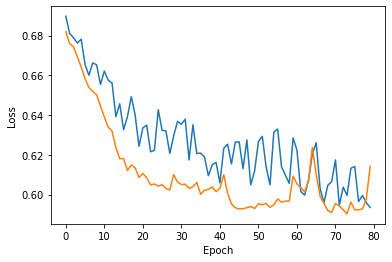

In [1044]:
left=result.history['loss']
height=result.history['val_loss']
plt.plot(left)
plt.plot(height)
plt.xlabel("Epoch")
plt.ylabel("Loss")

5. plot関数を使用して、学習データの正解率と検証データの正解率を折れ線グラフを描け。その際、x軸をEpoch、y軸をAccuracyとしてタイトルをつけよ。




```
#学習データの正解率
result.history['accuracy']
#検証データの正解率
result.history['val_accuracy']
```



Text(0, 0.5, 'accuracy')

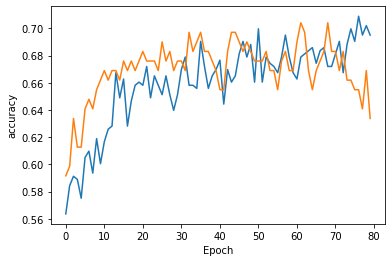

In [1045]:
left=result.history['accuracy']
height=result.history['val_accuracy']
plt.plot(left)
plt.plot(height)
plt.xlabel("Epoch")
plt.ylabel("accuracy")

6. 評価データの正解率を計算し、出力せよ。



In [1046]:
score = model.evaluate(X_val_t, y_val, verbose=0)
print('accuracy:', score[1])

accuracy: 0.6338028311729431




> 学習データと検証データにおける損失の違いについてよく確認しましょう。



> モデルの学習回数が多くなればなるほど、一般的にはモデルは学習データに対する過学習におちいります。
80エポックの学習を実行した結果としては、今回のモデルにおいても過学習が発生している模様です。したがって、未知のデータに対する精度を上げるためには、モデルが学習し過ぎないような工夫であったり、モデルの学習回数を調整する必要があります。次のQuestでは、モデルの学習に制限を設ける手法に取り組みます。







## **Quest6: モデルの予測精度の改善　〜過学習に対処せよ〜**

1. keras.layersからDropoutをインポートせよ。

In [1047]:
from keras.layers import Dropout

2. Quest5-2と同じ手順でネットワークを構築せよ。この際、Dropさせる割合を0.5と設定し、過学習を抑えよ。その後、 Quest5-3と同じ手順でモデルの学習を実行せよ。

In [1048]:

# ネットワークの各層のサイズの定義
num_l1 = 100
num_l2 = 20
num_output = 1

# 以下、ネットワークを構築
model = Sequential()
# 第1層
model.add(LSTM(units=num_l1,
                activation='tanh',
                batch_input_shape=(None, X_train_t.shape[1], X_train_t.shape[2])))
model.add(Dropout(0.5))
# 第2層
model.add(Dense(num_l2, activation='relu'))
model.add(Dropout(0.5))
# 出力層
model.add(Dense(num_output, activation='sigmoid'))
# ネットワークのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [1049]:
result=model.fit(X_train_t,y_train,epochs=80,batch_size=24,verbose=0,validation_data=(X_val_t, y_val))

3. Quest5-4, 5-5と同じ手順で、損失と正解率の折れ線グラフを描き、どれほど過学習が抑えられたか可視化して確認せよ。

Text(0, 0.5, 'Loss')

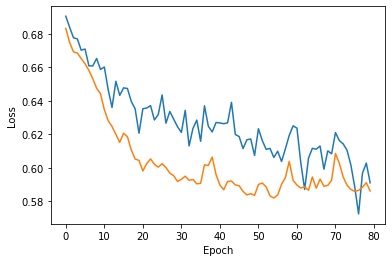

In [1050]:
left=result.history['loss']
height=result.history['val_loss']
plt.plot(left)
plt.plot(height)
plt.xlabel("Epoch")
plt.ylabel("Loss")


Text(0, 0.5, 'accuracy')

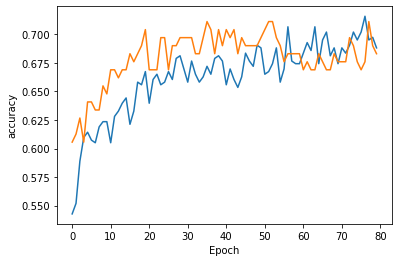

In [1051]:
left=result.history['accuracy']
height=result.history['val_accuracy']
plt.plot(left)
plt.plot(height)
plt.xlabel("Epoch")
plt.ylabel("accuracy")

4. 最後に評価データの正解率を計算、表示し、Quest5-6の結果からの増減を確認せよ。

In [1052]:
score = model.evaluate(X_val_t, y_val, verbose=0)
print('accuracy:', score[1])

accuracy: 0.6830986142158508
